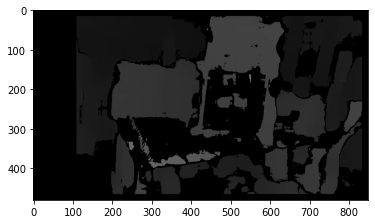

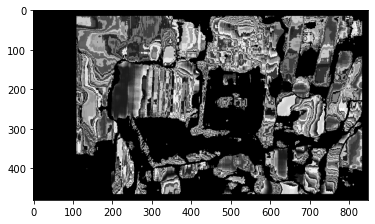

In [1]:
import numpy
import cv2
from matplotlib import pyplot as plt

img_1262 = cv2.imread('color1262.jpg')
img_1755 = cv2.imread('color1755.jpg')
img_1131 = cv2.imread('color1131.jpg')
img_0000 = cv2.imread('color0000.jpg')

img_infra1_1262 = cv2.imread('infra1_1262.jpg', 0)
img_infra1_1755 = cv2.imread('infra1_1755.jpg', 0)
img_infra1_1131 = cv2.imread('infra1_1131.jpg', 0)
img_infra1_0000 = cv2.imread('infra1_0000.jpg', 0)

img_infra2_1262 = cv2.imread('infra2_1262.jpg', 0)
img_infra2_1755 = cv2.imread('infra2_1755.jpg', 0)
img_infra2_1131 = cv2.imread('infra2_1131.jpg', 0)
img_infra2_0000 = cv2.imread('infra2_0000.jpg', 0)

left = img_infra1_1131
right = img_infra2_1131


fx = 970          # lense focal length
baseline = 50     # distance in mm between the two cameras
disparities = 96   # num of disparities to consider
block = 31          # block size to match
units = 0.001       # depth units

sbm = cv2.StereoBM_create(numDisparities=disparities,
                          blockSize=block)
# calculate disparities
disparity = sbm.compute(left, right)
plt.imshow(disparity, 'gray')
plt.show()

valid_pixels = disparity > 0

# calculate depth data
depth = numpy.zeros(shape=left.shape).astype("uint8")
# depth[valid_pixels] = (fx * baseline) / (disparity[valid_pixels])
depth[valid_pixels] = (fx * baseline) / (units*disparity[valid_pixels])
# visualize depth data
# depth = cv2.equalizeHist(depth)
plt.imshow(depth, 'gray')
plt.show()
